In [12]:
! pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import opendatasets as od
import pandas as pd
import seaborn as sns

In [14]:
od.download('https://www.kaggle.com/datasets/niraliivaghani/flipkart-product-customer-reviews-dataset/download?datasetVersionNumber=1')


Skipping, found downloaded files in "./flipkart-product-customer-reviews-dataset" (use force=True to force download)


In [15]:
df = pd.read_csv('flipkart-product-customer-reviews-dataset/Dataset-SA.csv')

In [16]:
df.describe()

,product_name,product_price,Rate,Review,Summary,Sentiment
count,205052,205052,205052,180388,205041,205052
unique,958,525,8,1324,92923,3
top,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,wonderful,good,positive
freq,6005,9150,118765,9016,17430,166581


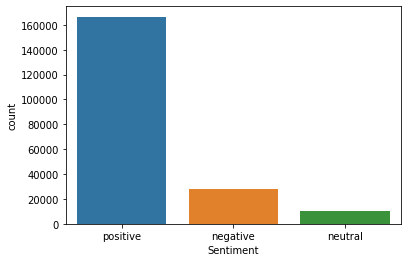

In [17]:
#Visualize sentiments
ax = sns.countplot(x='Sentiment',data=df)

In [18]:
#Check for values in each class
df['Sentiment'].value_counts()

positive    166581
negative     28232
neutral      10239
Name: Sentiment, dtype: int64

In [19]:
#Check for nulls 
df.isna().sum()

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

In [20]:
from sklearn.impute import SimpleImputer


# Check for missing values
print(df.isnull().sum())

# Define the imputer and fit it to the data
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(df[['Review', 'Summary']])

# Transform the data to fill in missing values
df[['Review', 'Summary']] = imputer.transform(df[['Review', 'Summary']])

# Check for missing values again
print(df.isnull().sum())

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64
product_name     0
product_price    0
Rate             0
Review           0
Summary          0
Sentiment        0
dtype: int64


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-21-1b2e583ab972>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews['Summary'] = reviews['Summary'].str.replace('[^\w\s]','')


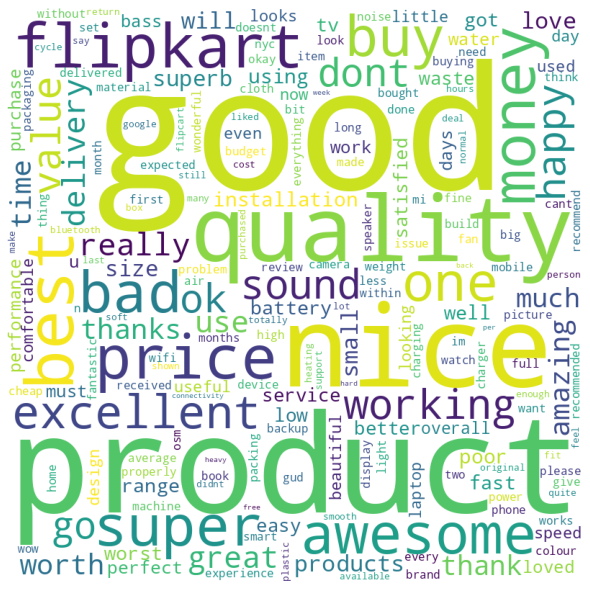

In [21]:
import pandas as pd
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

# Load the product review dataset
reviews = df

# Preprocess the data
reviews['Summary'] = reviews['Summary'].str.lower()
reviews['Summary'] = reviews['Summary'].str.replace('[^\w\s]','')
reviews['Summary'] = reviews['Summary'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.isalpha()]))

# Count the frequency of words
word_freq = Counter(' '.join(reviews['Summary']).split())

# Remove stop words
stop_words = set(STOPWORDS)
word_freq = {word: freq for word, freq in word_freq.items() if word not in stop_words}

# Create the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stop_words, min_font_size=10).generate_from_frequencies(word_freq)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


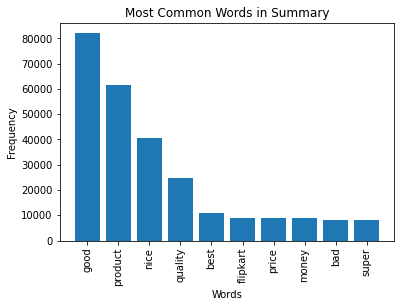

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
nltk.download('stopwords')

# Extract the most common words from the summary column
summary_words = reviews['Summary'].str.split(expand=True).unstack().value_counts()

# Remove stop words
stop_words = set(stopwords.words('english'))
summary_words = summary_words.drop(stop_words, errors='ignore')

# Plot the bar chart
plt.bar(summary_words[:10].index, summary_words[:10])
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Summary')
plt.show()


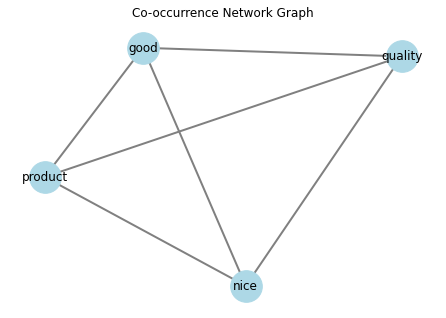

In [23]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Load the dataset
df = reviews

# Extract the most common words from the summary column
summary_words = df['Summary'].str.split(expand=True).stack().value_counts().head(10).reset_index()
summary_words.columns = ['word', 'count']

# Remove stop words
stop_words = set(stopwords.words('english'))
summary_words = summary_words[~summary_words['word'].isin(stop_words)]

# Create a co-occurrence matrix of the words in the summary column
co_matrix = pd.DataFrame(0, index=summary_words['word'], columns=summary_words['word'])
for summary in df['Summary']:
    words = set(summary.split())
    for w1 in words:
        if w1 in summary_words['word'].values:
            for w2 in words:
                if w2 in summary_words['word'].values and w1 != w2:
                    co_matrix.loc[w1, w2] += 1

# Create the network graph
G = nx.from_pandas_adjacency(co_matrix)

# Set the node labels and positions
pos = nx.spring_layout(G, seed=42)
labels = {node: node for node in G.nodes}

# Plot the network graph
nx.draw(G, pos, with_labels=True, labels=labels, font_size=12, node_color='lightblue', edge_color='gray', width=2, node_size=1000)
plt.title('Co-occurrence Network Graph')
plt.show()


In [ ]:
import nltk
from nltk.probability import FreqDist
import os
from collections import Counter
import statistics

Corpus = reviews

#Calculate the total number of unique video games
asinString = " ".join(Corpus['Review'])
tokens = nltk.word_tokenize(asinString)
fdist = FreqDist(tokens)
count_asin = len(fdist)

# Calculate the total number of unique reviewers
reviewerIDString = " ".join(Corpus['product_name'])
tokens = nltk.word_tokenize(reviewerIDString)
fdist = FreqDist(tokens)
count_reviewerID = len(fdist)

# Set data in variables for the dataframe
totalReviews = int(Corpus.shape[0])
file_size = os.path.getsize(r"/content/flipkart-product-customer-reviews-dataset/Dataset-SA.csv")
fileSize = int(round((file_size/2**20),2))
avgPerUser = int(round(statistics.mean(Counter(Corpus['product_name']).values()),2))
avgPerVG = int(round(statistics.mean(Counter(Corpus['Review']).values()),2))
minReviews = min(Counter(Corpus['Review']).values())
maxReviews = max(Counter(Corpus['Review']).values())

# Create a new dataframe to print a clear table
d1 = {'Description': ["Total reviews",
                      "File size (MB)",
                      "Total number of unique products",
                      "Total number of unique reviewers",
                      "Average number of reviews per user", 
                      "Average number of reviews per product",
                      "Product with the minimum reviews",
                      "Product with the maximum reviews"],
      'Data': [totalReviews, fileSize, count_asin, count_reviewerID, avgPerUser, avgPerVG, minReviews, maxReviews]}

df1 = pd.DataFrame(data=d1)
df1

In [ ]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer

Corpus['polarity'] = Corpus['Review'].map(lambda text: TextBlob(text).sentiment.polarity)


In [ ]:
sorted_df = Corpus.groupby('product_name').mean().reset_index().sort_values(by='polarity',ascending=False)
sorted_df.head(10)

In [ ]:
sorted_df.tail(10)

In [ ]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')


# Define the preprocessing functions
def preprocess(text):
    # Convert all text to lowercase
    text = text.lower()
    
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Remove stop words and punctuations
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words and word not in string.punctuation]
    
    # Remove numerical values
    words = [word for word in words if not word.isnumeric()]
    
    # Stem the words using Porter stemmer
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    # Lemmatize the words using WordNet lemmatizer
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join the words back into a string
    text = ' '.join(words)
    
    return text

# Create a new column with preprocessed text
df['preprocessed_text'] = df['Summary'].apply(preprocess)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer()
transformed = v.fit_transform(df['preprocessed_text'])
print(v.vocabulary_)

In [ ]:

all_feature_names = v.get_feature_names_out()

for word in all_feature_names:
  indx = v.vocabulary_.get(word)
  print(f"{word} : {v.idf_[indx]}")

In [ ]:
transformed.toarray()[:1]

In [ ]:
df

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler,SMOTE

df=reviews


le = LabelEncoder()
df['Sentiment'] = le.fit_transform(df['Sentiment'])

X_train, X_test, y_train,y_test = train_test_split(df['preprocessed_text'],df['Sentiment'],test_size=0.2,random_state=42,stratify=df['Sentiment'])


In [ ]:
y_train.value_counts()

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import classification_report

clf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('count_vectorizer', CountVectorizer()),
    ('SMOTE', SMOTE(random_state=42)),
    ('KNN', KNeighborsClassifier())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('SMOTE', SMOTE(random_state=42)),
    ('Naive Bayes', MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.linear_model import LogisticRegression

clf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('SMOTE', SMOTE(random_state=42)),
    ('Naive Bayes', LogisticRegression(max_iter=1000))
])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))